In this notebook several methods for proving inequalities have been compared.

First of all we need a dataset. 35 inequalities were selected from https://www.imomath.com/index.php?options=592&lmm=0. Each inequality is represented by a tuple: inequality (in LaTeX), inequality constraints (for example: $a\in [0,1]$, equality constraints (for example: $abc=1$) and a function which converts inequality to a formula which we want to prove it's nonnegativity. In most cases when this function is simply a difference between left and right-hand side, but sometimes it's better to use difference between squares of sides (to get rid of square roots). These tuples are used as parameters in `parser` function which converts them to equivalent inequalities with default constraints (i.e. all variables are positive).

Some tuples have less than 4 elements. In this case `parser` use default arguments.

In [1]:
from sympy import *
import shiroindev
from shiroindev import *
from sympy.parsing.latex import parse_latex
shiro.seed=1
from IPython.display import Latex
shiro.display=lambda x:display(Latex(x))

`sympy` has a `parse_latex` function which converts LaTeX formula to a `sympy` one. Unfortunately it doesn't deal with missing braces in the way that LaTeX do. For example `\frac12` generates $\frac12$ which is the same as `\frac{1}{2}`, but `parse_latex` accepts only the second version. So here there is a boring function which adds missing braces.

In [2]:
def addbraces(s):
    arg={r'\frac':2,r'\sqrt':1}
    s2=''
    p=0
    while 1:
        m=re.search(r"\\[a-zA-Z]+", s[p:])
        if not m:
            break
        s2+=s[p:p+m.end()]
        p+=m.end()
        if m.group() in arg:
            for i in range(arg[m.group()]):
                sp=re.search('^ *',s[p:])
                s2+=sp.group()
                p+=sp.end()
                if s[p]=='{':
                    cb=re.search(r'^\{.*?\}',s[p:])
                    ab=addbraces(cb.group())
                    s2+=ab
                    p+=cb.end()
                else:
                    s2+='{'+s[p]+'}'
                    p+=1
    s2+=s[p:]
    return s2
print(addbraces(r'\frac{ \sqrt 3}2'))
print(addbraces(r'a^2+b^2+c^2\geq ab+bc+ca'))

\frac{ \sqrt {3}}{2}
a^2+b^2+c^2\geq ab+bc+ca


In [3]:
#(formula,intervals,subs,function)
dif=lambda b,s:b-s
dif2=lambda b,s:b*b-s*s
ineqs=[
    (r'a^2+b^2+c^2\geq ab+bc+ca',),
    (r'a^2+b^2+c^2+d^2\geq a(b+c+d)',),
    (r'1\leq\frac{a^2b^2}{c^2}+\frac{b^2c^2}{a^2}+\frac{c^2a^2}{b^2}',
     '[0,1-f],[0,1]','[a,sqrt(1-e-f)],[b,sqrt(e)],[c,sqrt(f)]',),
    (r'\frac1{1-x^2}+\frac1{1-y^2}\geq \frac2{1-xy}','[0,1],[0,1]'),
    (r'a^3+b^3\geq a^2b+ab^2',),
    (r'\frac a{b+c}+\frac b{c+a}+\frac c{a+b}\geq \frac32',),
    (r'2a^3+b^3\geq 3a^2b',),
    (r'a^3+b^3+c^3\geq a^2b+b^2c+c^2a',),
    (r'\frac a{b+c}+\frac b{c+d}+ \frac c{d+a}+ \frac d{a+b}\geq 2',),
    (r'\frac{a^3}{a^2+ab+b^2}+ \frac{b^3}{b^2+bc+c^2}+ \frac{c^3}{c^2+ca+a^2} \geq \frac{a+b+c}3',),
    (r'\sqrt{ab}+\sqrt{cd}+\sqrt{ef}\leq\sqrt{(a+c+e)(b+d+f)}','','',dif2),
    (r'\frac{5a^3-ab^2}{a+b}+\frac{5b^3-bc^2}{b+c}+\frac{5c^3-ca^2}{c+a}\geq 2(a^2+b^2+c^2)',),
    #(r'\frac{a^2}{(1+b)(1-c)}+\frac{b^3}{(1+c)(1-d)}+\frac{c^3}{(1+d)(1-a)}+\frac{d^3}{(1+a)(1-b)}\geq\frac1{15}',
    # '[0,1-c-d],[0,1-d],[0,1]','[a,1-b-c-d]'),
    (r'\frac{x^3}{(1+y)(1+z)}+\frac{y^3}{(1+z)(1+x)}+\frac{z^3}{(1+x)(1+y)}\geq\frac{3}{4}','','[z,1/(x*y)]'),
    (r'\frac ab+\frac bc+\frac ca\geq \frac{(a+b+c)^2}{ab+bc+ca}',),
    (r'\frac{a^2}b+\frac{b^2}c+\frac{c^2}a\geq \frac{a^2+b^2+c^2}{a+b+c}',),
    (r'\frac{a^2}b+\frac{b^2}c+\frac{c^2}a\geq a+b+c+\frac{4(a-b)^2}{a+b+c}',),
    (r'\frac1{a^3+b^3+abc}+ \frac1{b^3+c^3+abc} +\frac1{c^3+a^3+ abc} \leq \frac1{abc}',),
    (r'\frac1{a^3(b+c)}+ \frac1{b^3(c+a)}+ \frac1{c^3(a+b)} \geq \frac32','','[c,1/(a*b)]'),
    (r'\frac{a^3}{b^2-bc+c^2}+\frac{b^3}{c^2-ca+a^2} + \frac{c^3}{a^2-ab+b^2} \geq 3 \cdot\frac{ab+bc+ca}{a+b+c}',),
    (r'\frac{x^5-x^2}{x^5+y^2+z^2}+\frac{y^5-y^2}{y^5+z^2+x^2}+\frac{z^5-z^2}{z^5+x^2+y^2}\geq0','','[x,1/(y*z)]'),
    (r'(a+b-c)(b+c-a)(c+a-b)\leq abc',),
    (r'\frac1{1+xy}+\frac1{1+yz}+\frac1{1+zx}\leq \frac34','','[x,(y+z)/(y*z-1)]'),
    (r'\frac{x\sqrt x}{y+z}+\frac{y\sqrt y}{z+x}+\frac{z\sqrt z}{x+y}\geq\frac{ \sqrt 3}2',
     '[0,1-z],[0,1]','[x,1-y-z]'),
    (r'a^4+b^4+c^4+d^4\geq 4abcd',),
    (r'\frac{ab}{a+b}+\frac{bc}{b+c}+\frac{ca}{c+a}\leq\frac{3(ab+bc+ca)}{2(a+b+c)}',),
    (r'\sqrt{a-1}+\sqrt{b-1}+ \sqrt{c-1} \leq \sqrt{c(ab+1)}','[1,oo],[1,oo],[1,oo]','',dif2),
    (r'(x-1)(y-1)(z-1)\geq 8','[0,1-b-c],[0,1-c],[0,1]','[x,1/a],[y,1/b],[z,1/c]'),
    (r'ay+bz+cx\leq s^2','[0,s],[0,s],[0,s]','[x,s-a],[y,s-b],[z,s-c]'),
    (r'x_1^2+x_2^2+x_3^2+x_4^2+x_5^2\geq 2 (x_1x_2+x_2x_3+x_3x_4+x_4x_5)/\sqrt{3}',),
    (r' xy+yz+zx - 2xyz \leq \frac7{27}', '[0,1-z],[0,1]','[x,1-y-z]'),
    (r'0 \leq xy+yz+zx - 2xyz', '[0,1-z],[0,1]','[x,1-y-z]'),
    (r'\sqrt{3+a+b+c}\geq\sqrt a+\sqrt b+\sqrt c','[1-z,1],[0,1]','[a,1/x-1],[b,1/y-1],[c,1/z-1],[x,2-y-z]',
     dif2),
    (r'\frac{2a^3}{a^2+b^2}+\frac{2b^3}{b^2+c^2}+\frac{2c^3}{c^2+a^2}\geq a+b+c',),
    (r'\frac{a^2}{b+c}+\frac{b^2}{c+a}+\frac{c^2}{a+b}\geq \frac12','[0,1-c],[0,1]','[a,1-b-c]'),
    (r'\frac{a+b}{2b+c}+\frac{b+c}{2c+a}+\frac{c+a}{2a+b}\geq 2',),
    #(r'\frac x{5-y^2}+\frac y{5-z^2}+\frac z{5-x^2}\geq \frac34','[0,sqrt(5)],[0,sqrt(5)]','[x,1/(y*z)]')
]



In [4]:
def parser(formula,intervals='[]',subs='[]',func=dif):
    newproof()
    shiro.display=lambda x:None
    if intervals=='':
        intervals='[]'
    if subs=='':
        subs='[]'
    formula=addbraces(formula)
    formula=Sm(str(parse_latex(formula)))
    formula,_=fractioncancel(formula)
    formula=formula.subs(shiroindev._smakeiterable2(subs))
    formula=makesubs(formula,intervals)
    b,s=formula.lhs,formula.rhs
    if type(formula)==LessThan:
        b,s=s,b
    formula=func(b,s)
    formula=simplify(formula)
    num,den=fractioncancel(formula)
    return num

In [5]:
from tqdm import tqdm
ineqs2=[]
for ineq in tqdm(ineqs):
    ineqs2+=[parser(*ineq)]

100%|██████████| 35/35 [00:46<00:00,  1.32s/it]


Now let's look at the formulas when converted to polynomials.

In [6]:
for i,ineq in zip(range(len(ineqs2)),ineqs2):
    print(i)
    display(reducegens(assumeall(ineq,positive=True)))

0


Poly(a**2 - a*b - a*c + b**2 - b*c + c**2, a, b, c, domain='ZZ')

1


Poly(a**2 - a*b - a*c - a*d + b**2 + c**2 + d**2, a, b, c, d, domain='ZZ')

2


Poly(a**4*b**2 + a**3*b**2 - a**3*b - 2*a**2*b + a**2 + a*b**2 - a*b + b**2, a, b, domain='ZZ')

3


Poly(2*a**3*b + a**3 - 4*a**2*b**2 - a**2*b + a**2 + 2*a*b**3 - a*b**2 - 2*a*b + b**3 + b**2, a, b, domain='ZZ')

4


Poly(a**3 - a**2*b - a*b**2 + b**3, a, b, domain='ZZ')

5


Poly(2*a**3 - a**2*b - a**2*c - a*b**2 - a*c**2 + 2*b**3 - b**2*c - b*c**2 + 2*c**3, a, b, c, domain='ZZ')

6


Poly(2*a**3 - 3*a**2*b + b**3, a, b, domain='ZZ')

7


Poly(a**3 - a**2*b - a*c**2 + b**3 - b**2*c + c**3, a, b, c, domain='ZZ')

8


Poly(a**3*c + a**3*d + a**2*b**2 - a**2*b*d - 2*a**2*c**2 - a**2*c*d + a**2*d**2 + a*b**3 - a*b**2*c - a*b**2*d - a*b*c**2 + a*c**3 - a*c*d**2 + b**3*d + b**2*c**2 - 2*b**2*d**2 + b*c**3 - b*c**2*d - b*c*d**2 + b*d**3 + c**2*d**2 + c*d**3, a, b, c, d, domain='ZZ')

9


Poly(2*a**5*b**2 + 2*a**5*b*c + 2*a**5*c**2 + a**4*b**3 - a**4*b**2*c - a**4*b*c**2 + a**4*c**3 + a**3*b**4 - 2*a**3*b**3*c - 4*a**3*b**2*c**2 - 2*a**3*b*c**3 + a**3*c**4 + 2*a**2*b**5 - a**2*b**4*c - 4*a**2*b**3*c**2 - 4*a**2*b**2*c**3 - a**2*b*c**4 + 2*a**2*c**5 + 2*a*b**5*c - a*b**4*c**2 - 2*a*b**3*c**3 - a*b**2*c**4 + 2*a*b*c**5 + 2*b**5*c**2 + b**4*c**3 + b**3*c**4 + 2*b**2*c**5, a, b, c, domain='ZZ')

10


Poly((sqrt(a))**2*(sqrt(d))**2 + (sqrt(a))**2*(sqrt(f))**2 - 2*(sqrt(a))*(sqrt(b))*(sqrt(c))*(sqrt(d)) - 2*(sqrt(a))*(sqrt(b))*(sqrt(e))*(sqrt(f)) + (sqrt(b))**2*(sqrt(c))**2 + (sqrt(b))**2*(sqrt(e))**2 + (sqrt(c))**2*(sqrt(f))**2 - 2*(sqrt(c))*(sqrt(d))*(sqrt(e))*(sqrt(f)) + (sqrt(d))**2*(sqrt(e))**2, sqrt(a), sqrt(b), sqrt(c), sqrt(d), sqrt(e), sqrt(f), domain='ZZ')

11


Poly(3*a**4*b + 3*a**4*c - 2*a**3*b**2 + 2*a**3*c**2 + 2*a**2*b**3 - 6*a**2*b**2*c - 6*a**2*b*c**2 - 2*a**2*c**3 + 3*a*b**4 - 6*a*b**2*c**2 + 3*a*c**4 + 3*b**4*c - 2*b**3*c**2 + 2*b**2*c**3 + 3*b*c**4, a, b, c, domain='ZZ')

12


Poly(4*x**8*y**4 + 4*x**7*y**4 - 3*x**5*y**5 - 3*x**5*y**4 + 4*x**4*y**8 + 4*x**4*y**7 - 3*x**4*y**5 - 6*x**4*y**4 - 3*x**4*y**3 - 3*x**3*y**4 - 3*x**3*y**3 + 4*x*y + 4, x, y, domain='ZZ')

13


Poly(a**3*c**2 + a**2*b**3 - a**2*b**2*c - a**2*b*c**2 - a*b**2*c**2 + b**2*c**3, a, b, c, domain='ZZ')

14


Poly(a**4*c + a**3*c**2 + a**2*b**3 + a*b**4 + b**2*c**3 + b*c**4, a, b, c, domain='ZZ')

15


Poly(a**4*c - 4*a**3*b*c + a**3*c**2 + a**2*b**3 + 6*a**2*b**2*c - 2*a**2*b*c**2 + a*b**4 - 4*a*b**3*c - 2*a*b**2*c**2 + b**2*c**3 + b*c**4, a, b, c, domain='ZZ')

16


Poly(a**6*b**3 + a**6*c**3 - 2*a**5*b**2*c**2 + a**3*b**6 + a**3*c**6 - 2*a**2*b**5*c**2 - 2*a**2*b**2*c**5 + b**6*c**3 + b**3*c**6, a, b, c, domain='ZZ')

17


Poly(2*a**8*b**8 + 2*a**7*b**6 + 2*a**6*b**7 - 3*a**6*b**5 - 3*a**5*b**6 + 2*a**5*b**5 - 3*a**5*b**3 + 2*a**5*b**2 - 6*a**4*b**4 + 2*a**4*b**3 + 2*a**4 - 3*a**3*b**5 + 2*a**3*b**4 - 3*a**3*b**2 + 2*a**3*b + 2*a**2*b**5 - 3*a**2*b**3 + 2*a*b**3 + 2*b**4, a, b, domain='ZZ')

18


Poly(a**8 - a**6*b*c - 2*a**5*b**3 + a**5*b**2*c + a**5*b*c**2 - 2*a**5*c**3 + 3*a**4*b**4 - a**4*b**3*c + 2*a**4*b**2*c**2 - a**4*b*c**3 + 3*a**4*c**4 - 2*a**3*b**5 - a**3*b**4*c - a**3*b**3*c**2 - a**3*b**2*c**3 - a**3*b*c**4 - 2*a**3*c**5 + a**2*b**5*c + 2*a**2*b**4*c**2 - a**2*b**3*c**3 + 2*a**2*b**2*c**4 + a**2*b*c**5 - a*b**6*c + a*b**5*c**2 - a*b**4*c**3 - a*b**3*c**4 + a*b**2*c**5 - a*b*c**6 + b**8 - 2*b**5*c**3 + 3*b**4*c**4 - 2*b**3*c**5 + c**8, a, b, c, domain='ZZ')

19


Poly(y**18*z**9 + 2*y**16*z**14 - y**15*z**9 + 2*y**14*z**16 - y**14*z**13 - y**13*z**14 - y**13*z**11 - y**12*z**12 + y**12*z**9 - y**11*z**13 - y**11*z**7 + 2*y**11*z**4 - y**10*z**5 + y**9*z**18 - y**9*z**15 + y**9*z**12 - y**9*z**6 - y**8*z**4 - y**7*z**11 - y**7*z**5 + 2*y**7*z**2 - y**6*z**9 + y**6*z**6 - y**5*z**10 - y**5*z**7 + 2*y**4*z**11 - y**4*z**8 - y**3*z**3 + 2*y**2*z**7 + 1, y, z, domain='ZZ')

20


Poly(a**3 - a**2*b - a**2*c - a*b**2 + 3*a*b*c - a*c**2 + b**3 - b**2*c - b*c**2 + c**3, a, b, c, domain='ZZ')

21


Poly(2*y**4*z**2 - y**3*z**3 - 5*y**3*z + 2*y**2*z**4 - 9*y**2*z**2 + 5*y**2 - 5*y*z**3 + 23*y*z + 5*z**2 - 9, y, z, domain='ZZ')

22


Poly(2*(sqrt(a))**5*(sqrt(b))**2*(1/sqrt(a*b + a + b + 1)) + 2*(sqrt(a))**5*(1/sqrt(a*b + a + b + 1)) + 2*(sqrt(a))**4*(sqrt(b))**7*(1/sqrt(b + 1)) + 2*(sqrt(a))**4*(sqrt(b))**5*(1/sqrt(b + 1)) + 2*(sqrt(a))**4*(sqrt(b))**4*(1/(a*b*sqrt(a*b + a + b + 1) + a*sqrt(a*b + a + b + 1) + b*sqrt(a*b + a + b + 1) + sqrt(a*b + a + b + 1))) - (sqrt(a))**4*(sqrt(b))**4*(sqrt(3)) + 2*(sqrt(a))**4*(sqrt(b))**2*(1/(a*b*sqrt(a*b + a + b + 1) + a*sqrt(a*b + a + b + 1) + b*sqrt(a*b + a + b + 1) + sqrt(a*b + a + b + 1))) - (sqrt(a))**4*(sqrt(b))**2*(sqrt(3)) + 2*(sqrt(a))**3*(sqrt(b))**2*(1/sqrt(a*b + a + b + 1)) + 4*(sqrt(a))**2*(sqrt(b))**7*(1/sqrt(b + 1)) + 4*(sqrt(a))**2*(sqrt(b))**5*(1/sqrt(b + 1)) + 4*(sqrt(a))**2*(sqrt(b))**4*(1/(a*b*sqrt(a*b + a + b + 1) + a*sqrt(a*b + a + b + 1) + b*sqrt(a*b + a + b + 1) + sqrt(a*b + a + b + 1))) - 2*(sqrt(a))**2*(sqrt(b))**4*(sqrt(3)) + 2*(sqrt(a))**2*(sqrt(b))**3*(1/sqrt(b + 1)) + 6*(sqrt(a))**2*(sqrt(b))**2*(1/(a*b*sqrt(a*b + a + b + 1) + a*sqrt(a*b + a + b +

23


Poly(a**4 - 4*a*b*c*d + b**4 + c**4 + d**4, a, b, c, d, domain='ZZ')

24


Poly(a**3*b**2 + a**3*c**2 + a**2*b**3 - 2*a**2*b**2*c - 2*a**2*b*c**2 + a**2*c**3 - 2*a*b**2*c**2 + b**3*c**2 + b**2*c**3, a, b, c, domain='ZZ')

25


Poly((sqrt(d))**2*(sqrt(e))**2*(sqrt(f))**2 + (sqrt(d))**2*(sqrt(e))**2 + (sqrt(d))**2*(sqrt(f))**2 - 2*(sqrt(d))*(sqrt(e)) - 2*(sqrt(d))*(sqrt(f)) + (sqrt(e))**2*(sqrt(f))**2 - 2*(sqrt(e))*(sqrt(f)) + (sqrt(f))**2 + 2, sqrt(d), sqrt(e), sqrt(f), domain='ZZ')

26


Poly(d*e**2*f**2 + d*e**2*f + 2*d*e*f**2 - 6*d*e*f + d*e + d*f**2 + d*f + e**2*f**2 + e**2*f + 2*e*f**2 + 3*e*f + e + f**2 + 2*f + 1, d, e, f, domain='ZZ')

27


Poly(s**2*d*e*f + s**2, s, d, e, f, domain='ZZ')

28


Poly(-2*(sqrt(3))*x_1*x_2 - 2*(sqrt(3))*x_2*x_3 - 2*(sqrt(3))*x_3*x_4 - 2*(sqrt(3))*x_4*x_5 + 3*x_1**2 + 3*x_2**2 + 3*x_3**2 + 3*x_4**2 + 3*x_5**2, sqrt(3), x_1, x_2, x_3, x_4, x_5, domain='ZZ')

29


Poly(7*a**2*b**3 - 6*a**2*b**2 - 6*a**2*b + 7*a**2 + 14*a*b**3 - 12*a*b**2 + 15*a*b - 13*a + 7*b**3 - 6*b**2 - 6*b + 7, a, b, domain='ZZ')

30


Poly(a**2*b**2 + a**2*b + 2*a*b**2 + a*b + a + b**2 + b, a, b, domain='ZZ')

31


Poly(-2*(1/sqrt(b))*(sqrt(a**2*b**2/(a**2*b + a**2 + a*b**2 + 3*a*b + 2*a + b**2 + 2*b + 1) + a**2*b/(a**2*b + a**2 + a*b**2 + 3*a*b + 2*a + b**2 + 2*b + 1) + a*b**2/(a**2*b + a**2 + a*b**2 + 3*a*b + 2*a + b**2 + 2*b + 1) + a*b/(a**2*b + a**2 + a*b**2 + 3*a*b + 2*a + b**2 + 2*b + 1))) - 2*(1/sqrt(b))*(sqrt(a*b/(a**2*b + a**2 + a*b + 2*a + 1) + b/(a**2*b + a**2 + a*b + 2*a + 1))) - 2*(sqrt(a**2*b**2/(a**2*b + a**2 + a*b**2 + 3*a*b + 2*a + b**2 + 2*b + 1) + a**2*b/(a**2*b + a**2 + a*b**2 + 3*a*b + 2*a + b**2 + 2*b + 1) + a*b**2/(a**2*b + a**2 + a*b**2 + 3*a*b + 2*a + b**2 + 2*b + 1) + a*b/(a**2*b + a**2 + a*b**2 + 3*a*b + 2*a + b**2 + 2*b + 1)))*(sqrt(a*b/(a**2*b + a**2 + a*b + 2*a + 1) + b/(a**2*b + a**2 + a*b + 2*a + 1))) + 3, 1/sqrt(b), sqrt(a**2*b**2/(a**2*b + a**2 + a*b**2 + 3*a*b + 2*a + b**2 + 2*b + 1) + a**2*b/(a**2*b + a**2 + a*b**2 + 3*a*b + 2*a + b**2 + 2*b + 1) + a*b**2/(a**2*b + a**2 + a*b**2 + 3*a*b + 2*a + b**2 + 2*b + 1) + a*b/(a**2*b + a**2 + a*b**2 + 3*a*b + 2*a + b**2 

32


Poly(a**5*b**2 + a**5*c**2 + a**4*b**3 - a**4*b**2*c - a**4*b*c**2 - a**4*c**3 - a**3*b**4 + a**3*c**4 + a**2*b**5 - a**2*b**4*c - a**2*b*c**4 + a**2*c**5 - a*b**4*c**2 - a*b**2*c**4 + b**5*c**2 + b**4*c**3 - b**3*c**4 + b**2*c**5, a, b, c, domain='ZZ')

33


Poly(2*a**2*d**3 - a**2*d**2 - a**2*d + 2*a**2 + 4*a*d**3 - 2*a*d**2 - 3*a + 2*d**3 - d**2 - d + 2, a, d, domain='ZZ')

34


Poly(2*a**3 - 3*a**2*b + a**2*c + a*b**2 - 3*a*c**2 + 2*b**3 - 3*b**2*c + b*c**2 + 2*c**3, a, b, c, domain='ZZ')

Most formulas was converted to polynomials of independent variables. However formulas No. 22 and No. 31 were not. For this reason it's very unlikely that any method of proving these ones will succeed.

Now let's try some methods of proving these inequalities. The first one would be the simple `prove`.

In [7]:
tm=[0]*4

In [8]:
from collections import Counter
from timeit import default_timer as timer
start=timer()
t=[]
for ineq in ineqs2:
    t+=[prove(ineq)]
    print(t[-1],end=',')
tm[0]=timer()-start
print('\n',tm[0],sep='')
Counter(t)


0,2,2,0,0,0,0,0,2,0,0,0,0,0,0,2,0,0,2,0,2,2,2,0,0,2,2,0,2,2,0,2,0,2,0,
20.714609994000057


Counter({0: 21, 2: 14})

Code 0 means that the proof was found, all other codes means that proof wasn't found. So this method has proved 21 inequalities.

The second method uses `findvalues` function, rationalizes the result numbers and gives them as additional parameter to `prove` function.

In [9]:
def cut(a):
    if a<=0 or a>=100 or (a is None):
        return 1
    return a
start=timer()
t2=[]
for ineq in ineqs2:
    numvalues=findvalues(ineq,disp=0)
    values=nsimplify(numvalues,tolerance=0.1,rational=True)
    values=list(map(cut,values))
    t2+=[prove(ineq,values=values)]
    print(t2[-1],end=',')
tm[1]=timer()-start
print('\n',tm[1],sep='')
Counter(t2)


0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,2,0,0,2,0,2,2,2,0,0,2,0,0,2,2,0,2,0,2,0,
21.832711064998875


Counter({0: 24, 2: 11})

The third method is similar to the second one, but instead of rationalize values it squares, rationalizes and makes square roots of these values.

In [10]:
def cut(a):
    if a<=0 or a>=1000 or (a is None):
        return S(1)
    return a
    
start=timer()
t3=[]
for ineq in ineqs2:
    numvalues=findvalues(ineq,disp=0)
    numvalues=tuple([x**2 for x in numvalues])
    values=nsimplify(numvalues,tolerance=0.1,rational=True)
    values=[sqrt(x) for x in values]
    values=list(map(cut,values))
    t3+=[prove(ineq,values=values)]
    print(t3[-1],end=',')
tm[2]=timer()-start
print('\n',tm[2],sep='')
Counter(t3)


0,2,0,0,0,0,0,0,2,0,0,0,0,0,0,2,0,0,2,0,2,2,2,0,0,2,0,0,2,2,0,2,0,2,0,
21.697120987002563


Counter({0: 23, 2: 12})

Finally, the fourth method is a slight modification to the third method. It does the same "findvalues, square, rationalize and make square roots" thing, but then it scales the values and runs it again. It can sometimes help with uniform formulas.

In [11]:
def betw(a):
    return a>0.001 and a<1000 and a!=None
def cut(a):
    if betw(a):
        return a
    return S(1)

start=timer()
t4=[]
for ineq in ineqs2:
    numvalues=findvalues(ineq,disp=0)
    n=1
    numvalues2=[]
    for i in numvalues:
        if betw(i):
            n=1/i
            break
    for i in numvalues:
        if betw(i):
            numvalues2+=[i*n]
        else:
            numvalues2+=[1]
    numvalues3=findvalues(ineq,values=numvalues2,disp=0)
    numvalues4=tuple([x**2 for x in numvalues3])
    values=nsimplify(numvalues4,tolerance=0.1,rational=True)
    values=[sqrt(x) for x in values]
    values=list(map(cut,values))
    t4+=[prove(ineq,values=values)]
    print(t4[-1],end=',')
tm[3]=timer()-start
print('\n',tm[3],sep='')
Counter(t4)

0,2,0,0,0,0,0,0,2,0,0,0,0,0,0,2,0,0,2,0,2,2,2,0,0,2,0,0,0,2,0,2,0,2,0,
23.187820409999404


Counter({0: 24, 2: 11})

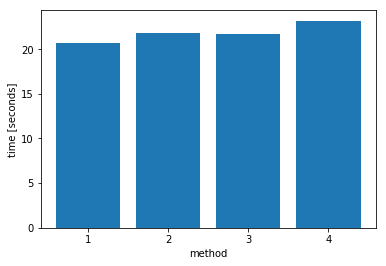

In [17]:
import matplotlib.pyplot as plt
plt.bar(['1','2','3','4'],tm)
plt.ylabel('time [seconds]')
plt.xlabel('method')
plt.show()

In [13]:
import pandas as pd
u=pd.DataFrame(zip(['']*len(ineqs),t,t2,t3,t4))

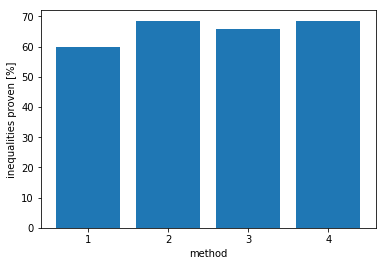

In [14]:
plt.bar(['1','2','3','4'],[sum(u[i]==0)/len(ineqs2)*100 for i in range(1,5)])
plt.ylabel('inequalities proven [%]')
plt.xlabel('method')
plt.show()

Down below there are contingency tables and McNemar test for every pair of methods.

In [15]:
for i in range(4):
    for j in range(i+1,4):
        display(pd.crosstab(u[i+1]==0, u[j+1]==0))

2      False  True 
1                  
False     11      3
True       0     21

3      False  True 
1                  
False     12      2
True       0     21

4      False  True 
1                  
False     11      3
True       0     21

3      False  True 
2                  
False     11      0
True       1     23

4      False  True 
2                  
False     10      1
True       1     23

4      False  True 
3                  
False     11      1
True       0     23

In [16]:
from statsmodels.stats.contingency_tables import mcnemar
for i in range(4):
    for j in range(i+1,4):
        print(mcnemar(pd.crosstab(u[i+1]==0, u[j+1]==0)))

pvalue      0.25
statistic   0.0
pvalue      0.5
statistic   0.0
pvalue      0.25
statistic   0.0
pvalue      1.0
statistic   0.0
pvalue      1.0
statistic   1.0
pvalue      1.0
statistic   0.0


In all cases p-value is greater than 0.05, so there is no statistical difference between the methods.